In [32]:
from utils import *
import matplotlib.pyplot as plt
import cv2

In [223]:
def encode_pixel_ycbr(byte, pixel):
    cr = (byte&48)>>1             #xxxx xxxx xxxb b111
    cb = (byte&192)>>3         #xxxx xxxx xxxc c111


    return (pixel[0],\
            cr+(pixel[1]&16352) + 7,\
            cb+(pixel[2]&16352) + 7)

In [224]:
def encode_ycbr(image, message):
    encoded_image = image.copy()
    message = text_image_generator(message)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            try:
                encoded_image[i][j] = encode_pixel_ycbr(next(message), image[i][j])
            except StopIteration:
                encoded_image[i][j] = [0, 0, 0]
                return encoded_image, cv2.cvtColor(encoded_image.astype(np.uint8), cv2.COLOR_YCR_CB2RGB)




In [225]:
encoded, encodedrgb = encode_ycbr(cv2.cvtColor(cv2.imread("Test_Image.jpg"), cv2.COLOR_BGR2YCR_CB).astype(np.uint16), "hello")

In [226]:
encoded.shape

(2727, 4849, 3)

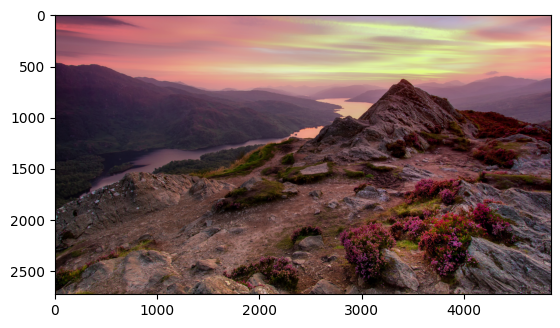

In [227]:
plt.imshow(encodedrgb)

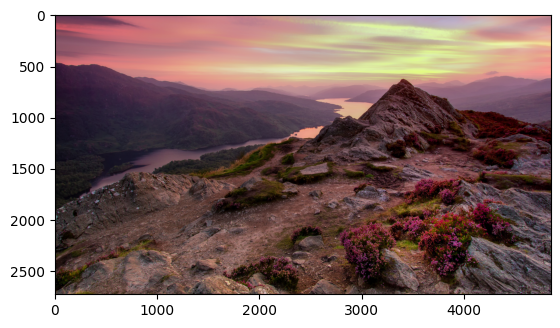

In [228]:
plt.imshow(cv2.cvtColor(cv2.imread("Test_Image.jpg"), cv2.COLOR_BGR2RGB))

In [231]:
def decode_from_pixel_ycbr(pixel):
    cr = pixel[1]&24
    cb = pixel[2]&24

    return (cr<<4) + (cb<<6) 

In [232]:
def decode_ycbr(image):
        message = []
        print(image.shape[0])
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if(len(message)==10000):#all(image[i][j]) == all([0, 0, 0])):
                    return message
                test = len(message)
                message.append(decode_from_pixel_ycbr(image[i][j]))




In [233]:
list = decode_ycbr(cv2.cvtColor(encodedrgb, cv2.COLOR_RGB2YCR_CB))

2727
302
2
10000
10000


In [234]:
len(list)

10000

In [235]:
list[0]

0

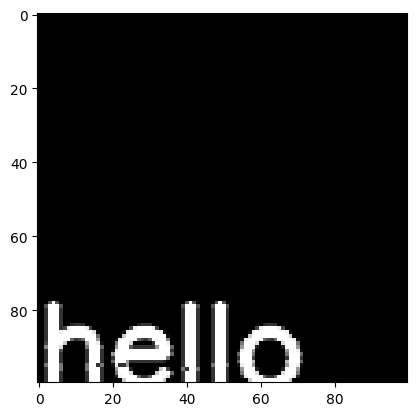

In [236]:
plt.imshow(np.array(list).reshape(100, 100), cmap='gray')